In Previous notebook, we performed univariate imputation. And we have selected features based on low variance.
In this notebook, we will perform those using autoviml(autoimpute, featurewiz).

In [ ]:
import pandas as pd

In [ ]:
!pip install featurewiz --ignore-installed --no-deps
!pip install xlrd --ignore-installed --no-deps 

In [ ]:
!pip install autoimpute

In [ ]:
df = pd.read_csv('/content/train.csv')
df.shape

(1460, 81)

#LabelEncdoer(To convert categorical to numerical)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = list(df.dtypes[df.dtypes == 'object'].index)
df_dummy = df.copy()
for c in cols:
  label = LabelEncoder()
  label.fit(list(df[c].values))
  df_dummy[c] = label.transform(list(df_dummy[c].values))

In [ ]:
df_dummy

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [ ]:
df_dummy.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

#AutoImpute

In [ ]:
from autoimpute.imputations import SingleImputer, MultipleImputer, MiceImputer
from autoimpute.visuals import plot_md_locations, plot_md_percent

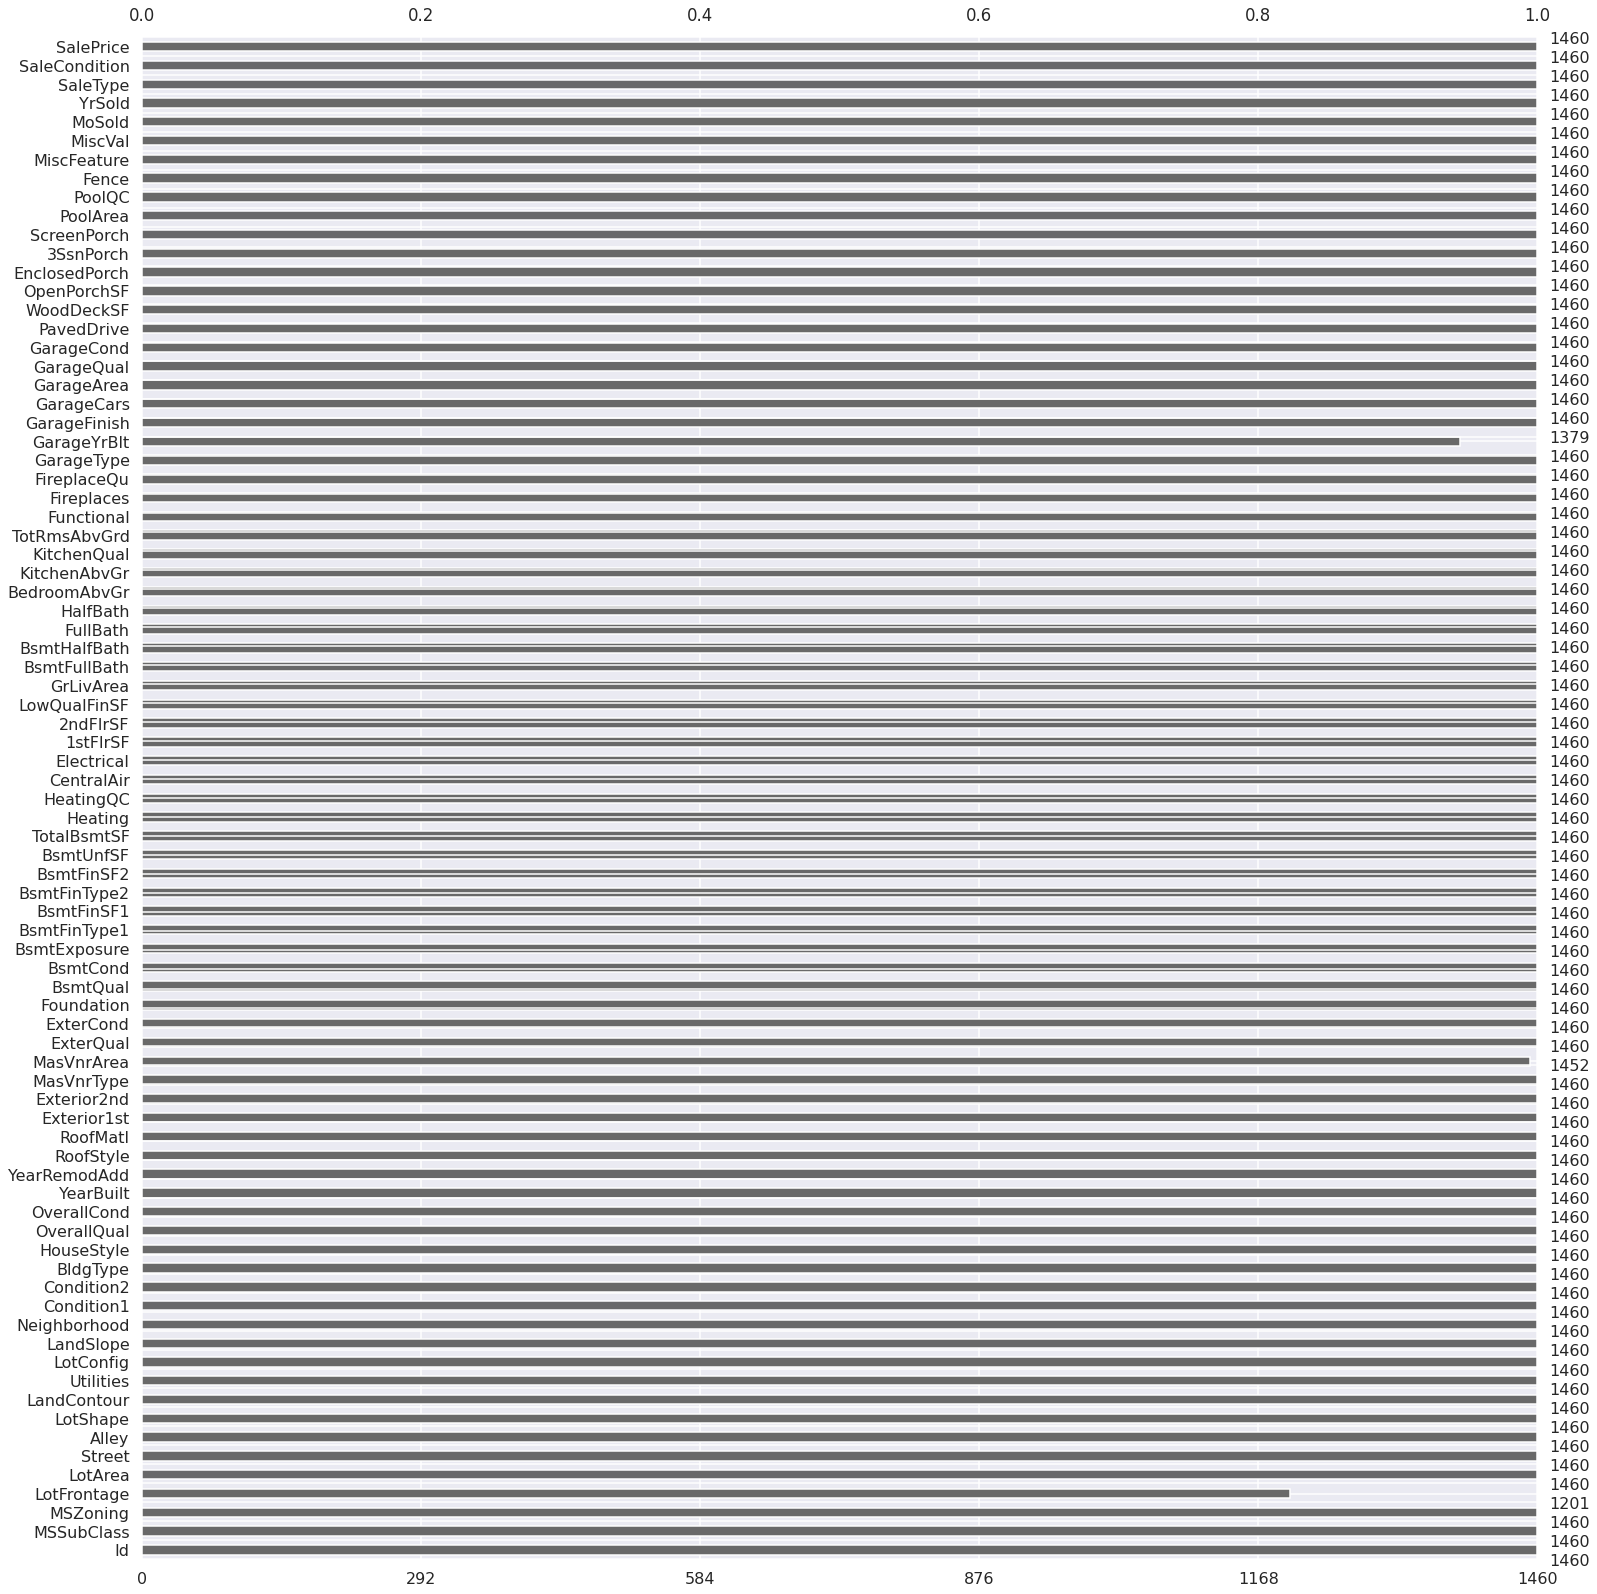

In [ ]:
plot_md_percent(df_dummy)

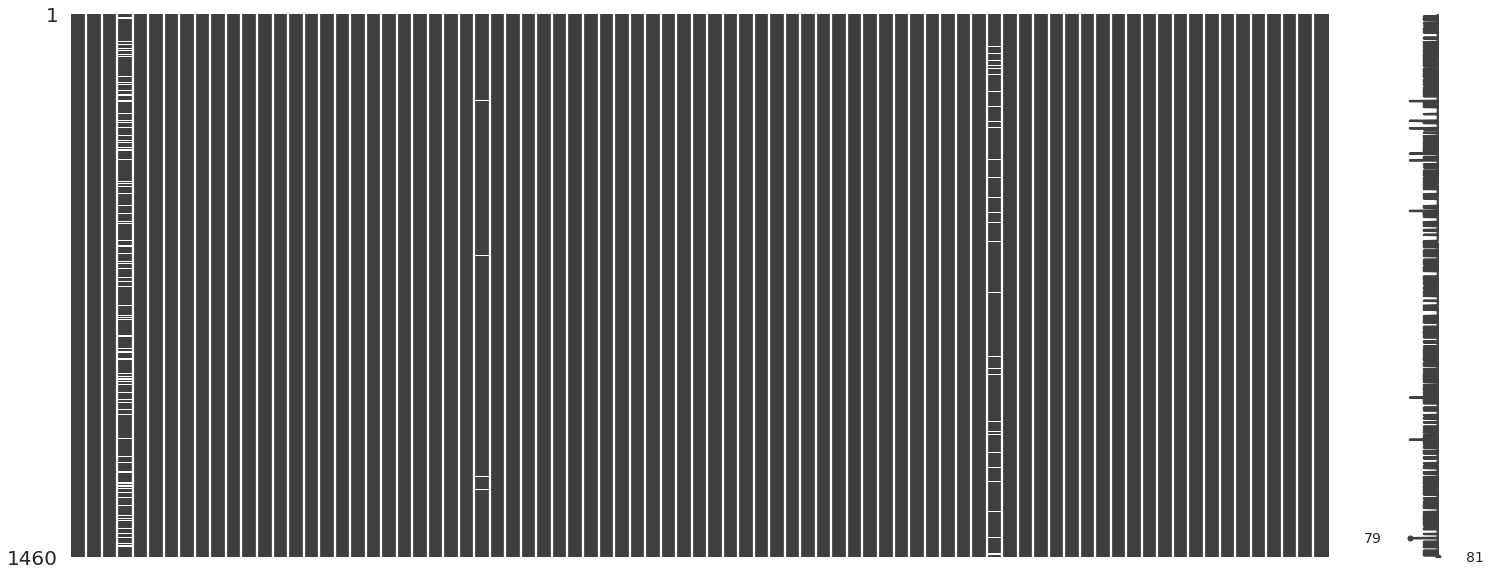

In [ ]:
plot_md_locations(df_dummy)

In [ ]:
'''MAR mean imputation'''

# create the mean imputer
mi_mean_mar = MultipleImputer(
    strategy="mean", n=5, return_list=False, seed=101
)

# print the mean imputer to console
print(mi_mean_mar)

# perform mean imputation procedure
imp_mean_mar = mi_mean_mar.fit(df_dummy)
#print((imp_mean_mar[0][1])=='nan')

MultipleImputer(seed=101, strategy='mean')


In [ ]:
X = imp_mean_mar.transform(df_dummy)
X

<generator object MultipleImputer.transform.<locals>.<genexpr> at 0x7f80c24c2450>

In [ ]:
imp_mean_mar

<generator object MultipleImputer.transform.<locals>.<genexpr> at 0x7f80c305f9d0>

In [ ]:
df_dummy.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

In [ ]:
mi = MultipleImputer()

In [ ]:
mi.statistics_

In [ ]:
df_trans = mi.fit_transform(df_dummy)

In [ ]:
df_dummy.isnull().sum().sort_values(ascending=False)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Id                0
KitchenAbvGr      0
               ... 
ExterQual         0
MasVnrType        0
Exterior2nd       0
Exterior1st       0
SalePrice         0
Length: 81, dtype: int64

In [ ]:
imp = MiceImputer()
imp.fit_transform(df_dummy)

<generator object MiceImputer.transform.<locals>.<genexpr> at 0x7f8092b009d0>

In [ ]:
mi_mean_var = MultipleImputer(
    strategy="mean", n=5, return_list=True, seed=101
)

In [ ]:
imp_mean_mar = mi_mean_var.fit_transform(df_dummy)

In [ ]:
!pip install Pillow==9.0.0

#FeatureWiz
(Using HousePricePrediction dataset)

In [ ]:
!pip install --upgrade category_encoders
from featurewiz import featurewiz



In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [ ]:
estimator=RandomForestRegressor(max_depth=8)
mice = IterativeImputer(estimator=estimator,random_state=11,skip_complete=True)

In [ ]:
impdata=mice.fit_transform(df_dummy)
impdata=pd.DataFrame(impdata,columns=df.columns)

In [ ]:
impdata.isnull().sum().sort_values(ascending=False)

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
              ..
MasVnrArea     0
MasVnrType     0
Exterior2nd    0
Exterior1st    0
SalePrice      0
Length: 81, dtype: int64

In [ ]:
impdata.rename(columns={'Unnamed: 0':'Id'},inplace=True)
target = 'SalePrice'
preds = [x for x in list(impdata) if x not in [target,'Id']]
print(impdata.shape)
impdata.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,2.0,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,3.0,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,4.0,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,5.0,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,...,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0,250000.0


In [ ]:
df_dummy = impdata.copy()
df_dummy.drop(['Id'], axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,3.0,65.0,8450.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2008.0,8.0,4.0,208500.0
1,20.0,3.0,80.0,9600.0,1.0,2.0,3.0,3.0,0.0,2.0,...,0.0,3.0,4.0,4.0,0.0,5.0,2007.0,8.0,4.0,181500.0
2,60.0,3.0,68.0,11250.0,1.0,2.0,0.0,3.0,0.0,4.0,...,0.0,3.0,4.0,4.0,0.0,9.0,2008.0,8.0,4.0,223500.0
3,70.0,3.0,60.0,9550.0,1.0,2.0,0.0,3.0,0.0,0.0,...,0.0,3.0,4.0,4.0,0.0,2.0,2006.0,8.0,0.0,140000.0
4,60.0,3.0,84.0,14260.0,1.0,2.0,0.0,3.0,0.0,2.0,...,0.0,3.0,4.0,4.0,0.0,12.0,2008.0,8.0,4.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,3.0,62.0,7917.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,4.0,0.0,8.0,2007.0,8.0,4.0,175000.0
1456,20.0,3.0,85.0,13175.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,2.0,4.0,0.0,2.0,2010.0,8.0,4.0,210000.0
1457,70.0,3.0,66.0,9042.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,0.0,2.0,2500.0,5.0,2010.0,8.0,4.0,266500.0
1458,20.0,3.0,68.0,9717.0,1.0,2.0,3.0,3.0,0.0,4.0,...,0.0,3.0,4.0,4.0,0.0,4.0,2010.0,8.0,4.0,142125.0


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (1460, 81)
#### Single_Label Regression problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID o

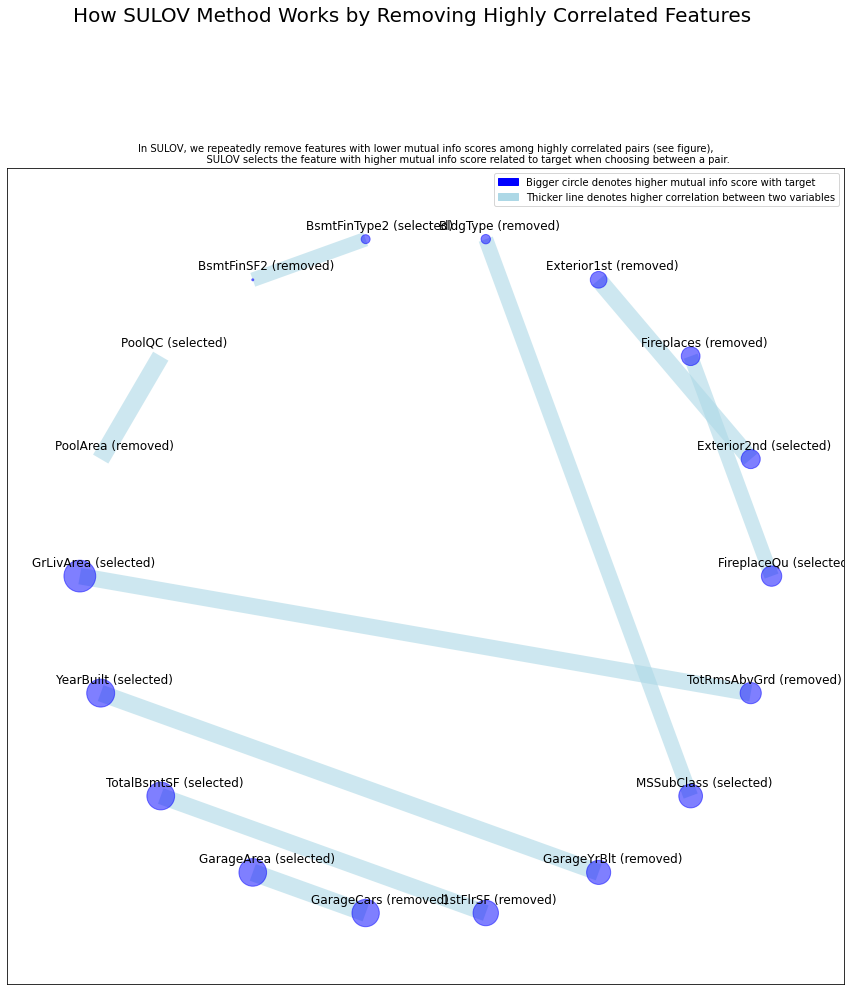

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 71
Finally 71 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 71 
    Taking top 12 features per iteration...
    XGBoost version using 0.90 as tree method: gpu_hist
Number of booster rounds = 100
        using 71 variables...
            selecting 34 features in this iteration
            Time taken for regular XGBoost feature selection = 1 seconds
        using 57 variables...
            selecting 27 features in this iteration
            Time taken for regular XGBoost feature selection = 1 secon

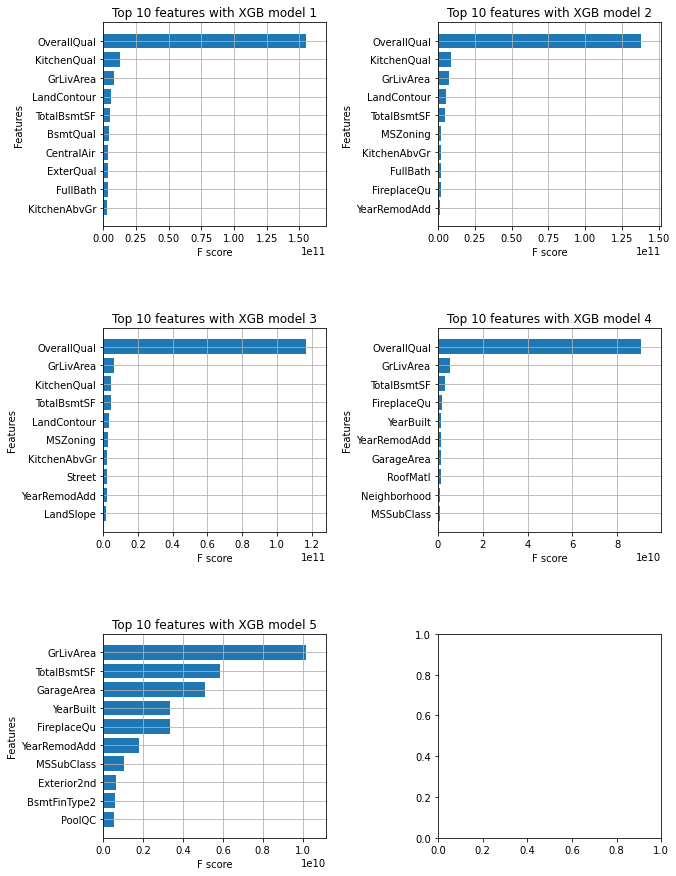

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 47 important features. Too many to print...
Total Time taken for featurewiz selection = 5 seconds
Output contains a list of 47 important features and a train dataframe


In [ ]:
target='SalePrice'
features = featurewiz(df_dummy, target, corr_limit=0.70, verbose = 2)

In [ ]:
print('Selected %d features:%s' %(len(features),features))

Selected 2 features:(['OverallQual', 'GarageCars', 'KitchenAbvGr', 'BsmtQual', 'KitchenQual', 'GrLivArea', 'LandContour', 'TotalBsmtSF', 'CentralAir', 'BsmtFinSF1', 'RoofMatl', 'FireplaceQu', 'GarageType', 'MSZoning', 'Alley', 'OverallCond', 'YearRemodAdd', 'BsmtFullBath', 'Condition2', 'ExterQual', 'YearBuilt', 'ScreenPorch', 'LotArea', 'GarageFinish', 'GarageCond', 'Neighborhood', 'Heating', 'Functional', 'BedroomAbvGr', 'PavedDrive', 'MasVnrType', '2ndFlrSF', 'LotShape', 'SaleCondition', 'LandSlope', 'OpenPorchSF', 'SaleType', 'MSSubClass'],       OverallQual  GarageCars  KitchenAbvGr  BsmtQual  KitchenQual  GrLivArea  \
0             7.0         2.0           1.0       2.0          2.0     1710.0   
1             6.0         2.0           1.0       2.0          3.0     1262.0   
2             7.0         2.0           1.0       2.0          2.0     1786.0   
3             7.0         3.0           1.0       3.0          2.0     1717.0   
4             8.0         3.0           1.0 

Using SULOV and XGBoost, 81 features are reduced to 39

# FeatureWiz(Using boston dataset)

In [ ]:
dft = pd.read_csv('/content/boston.csv')
dft.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
target = ['MEDV']
dft.shape

(506, 14)

In [ ]:
dft[target[0]] = dft[target[0]].fillna(0)
dft[target].isnull().sum()

MEDV    0
dtype: int64

In [ ]:
df_dummy = dft.copy()
df_dummy.drop(['MEDV'], axis=1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
import featurewiz as FW

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.9
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Regression problem ####
    Loaded train data. Shape = (506, 14)
#### Single_Label Regression problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
        No variables were removed since no ID or

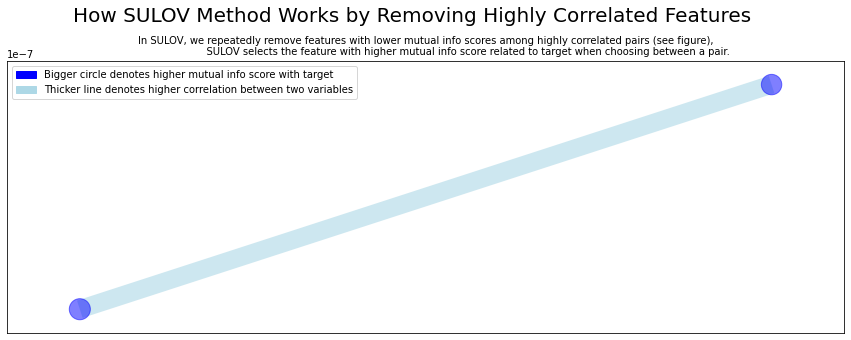

Time taken for SULOV method = 0 seconds
    Adding 0 categorical variables to reduced numeric variables  of 12
Final list of selected 12 vars after SULOV = ['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RM', 'ZN', 'TAX']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 12 
    Taking top 3 features per iteration...
    XGBoost version using 0.90 as tree method: gpu_hist
Number of booster rounds = 100
        using 12 variables...
            selecting 5 features in this iteration
            Time taken for regular XGBoost feature selection = 1 seconds
        using 10 variables...
            selecting 4 f

In [ ]:
features = FW.featurewiz(dft, target, verbose = 1)
                             

Of 14 features, 5 were selected

# AutoViML

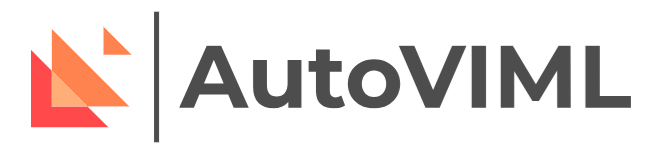

In [ ]:
!pip install autoviml --upgrade --ignore-installed

In [ ]:
from autoviml.Auto_ViML import Auto_ViML

Imported Auto_ViML version: 0.1.710. Call using:
             m, feats, trainm, testm = Auto_ViML(train, target, test,
                            sample_submission='',
                            scoring_parameter='', KMeans_Featurizer=False,
                            hyper_param='RS',feature_reduction=True,
                             Boosting_Flag='CatBoost', Binning_Flag=False,
                            Add_Poly=0, Stacking_Flag=False,Imbalanced_Flag=False,
                            verbose=1)
            

Imported Auto_NLP version: 0.1.01.. Call using:
     train_nlp, test_nlp, nlp_pipeline, predictions = Auto_NLP(
                nlp_column, train, test, target, score_type='balanced_accuracy',
                modeltype='Classification',top_num_features=200, verbose=0,
                build_model=True)


In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')
target = 'SalePrice'
sample_submission=''
scoring_parameter = 'balanced-accuracy'

##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (1460, 81)
    Training Set Memory Usage = 0.90 MB
Test Set Shape = (1459, 80)
    Test Set Memory Usage = 0.89 MB
Single_Label Target: ['SalePrice']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using GridSearchCV for Hyper Parameter Tuning. This is slow. Switch to RS for faster tuning...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  31
    Number of String-Categorical Columns =  37
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  3
    Number of Numeri

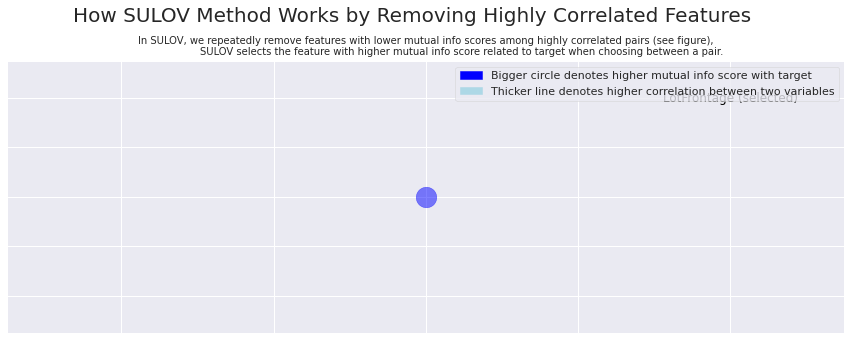

Splitting selected features into float and categorical (integer) variables:
    (3) float variables ...
    (91) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 94 
    Finding Important Features using Boosted Trees algorithm...
        using 94 variables...
        using 75 variables...
        using 56 variables...
        using 37 variables...
        using 18 variables...
Found 48 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  1168 , CV rows =  292
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling

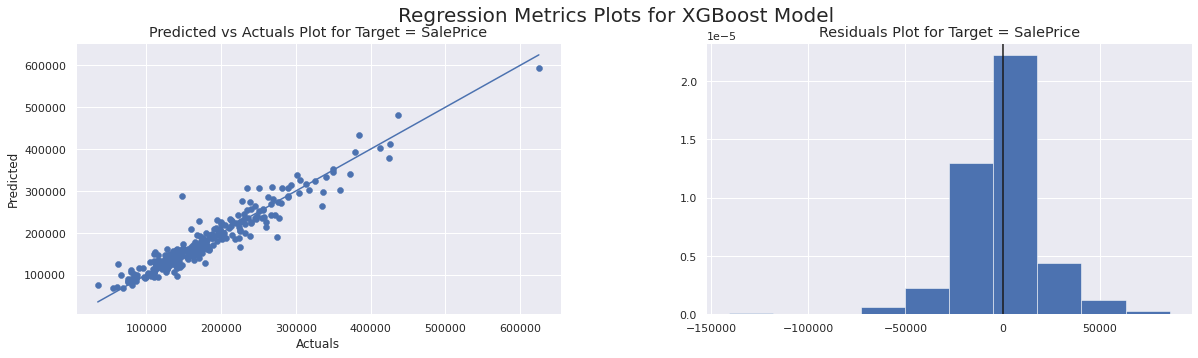

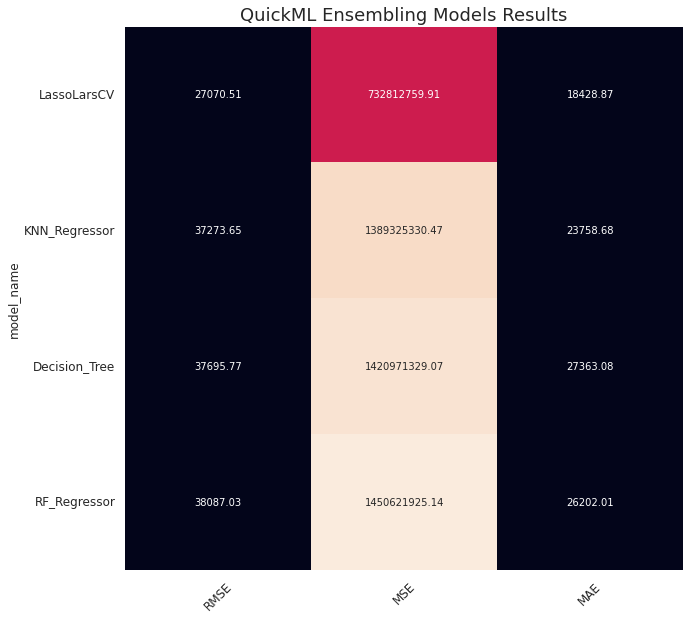

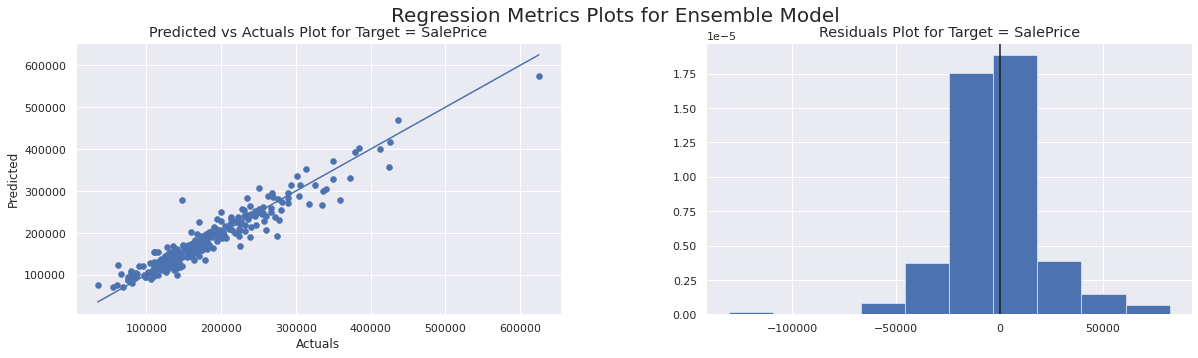

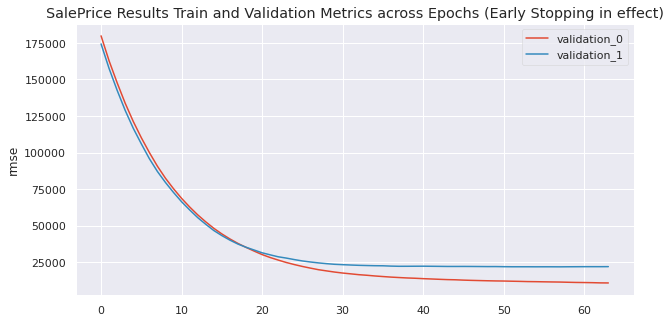

    Time taken for this Target (in seconds) = 224
    Binning_Flag set to False or there are no float vars in data set to be binned
Performing MinMax scaling of train and test data...
###########################################################################
#####   F I N A L I Z I N G   M O D E L   O N    F U L L   T R A I N  #####
###########################################################################
     Actual Training time taken in seconds = 0
Training of models completed. Now starting predictions on test data...
    Calculating weighted average ensemble of 5 regressors
Completed Ensemble predictions on held out data
    Plotting Feature Importances to explain the output of model
############### P R E D I C T I O N  O N  T E S T   C O M P L E T E D  #################
    Time taken thus far (in seconds) = 228
Writing Output files to disk...
    Saving predictions to ./SalePrice/SalePrice_Regression_test_modified.csv
    Saving predictions to ./SalePrice/SalePrice_Regression_

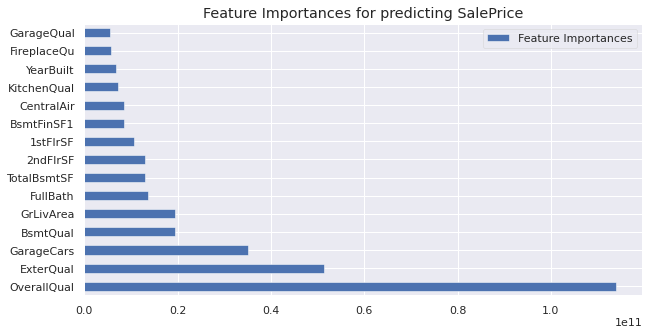

In [ ]:
model, features, trainm, testm = Auto_ViML(
    df_train,
    target,
    df_test, sample_submission,
    scoring_parameter=scoring_parameter,
    hyper_param='GS',feature_reduction=True,
    Boosting_Flag=True,Binning_Flag=False,
    Add_Poly=0, Stacking_Flag=False,                                    
    Imbalanced_Flag=False, 
    verbose=1)